<a href="https://colab.research.google.com/github/LeeSeungwon89/Deep-learning_Theory/blob/main/7-3%20%EC%8B%A0%EA%B2%BD%EB%A7%9D%20%EB%AA%A8%EB%8D%B8%20%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **7-3 신경망 모델 훈련**

## **손실 곡선**

케라스의 `fit()` 메서드는 `History` 클래스 인스턴스를 반환합니다. 이 인스턴스에 훈련 과정에서 계산한 지표(손실, 정확도)가 담겨 있습니다. 이 지표를 활용하여 그래프를 그릴 수 있습니다.

먼저 이전 챕터에서 사용했던 패션 MNIST 데이터 세트를 준비하겠습니다.

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target,
                                                                      test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


모델을 생성하는 함수를 선언해 보겠습니다.

In [2]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

if 구문은 렐루 함수를 적용한 은닉층 뒤에 다른 층 하나를 추가합니다. 

선언한 함수를 호출하여 이전 챕터에서 생성했던 모델을 동일하게 생성해 보겠습니다(`a_layer` 매개변수에 새로운 층을 추가하지 않습니다).

In [3]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


`fit()` 메서드의 결과를 `history` 변수에 담고 내용을 확인해 보겠습니다.

In [4]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# `verbose` 매개변수의 경우 디폴트 `1`은 에포크마다 진행 막대 및 손실 등 지표가 출력되고,
# `2`는 진행 막대는 제외하고 출력하며, `0`은 훈련 과정을 생략합니다.
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

print(history)
print(history.history)
print(history.history.keys())

{'loss': [0.5291024446487427, 0.39143067598342896, 0.35455480217933655, 0.333158403635025, 0.31770461797714233], 'accuracy': [0.8146666884422302, 0.859333336353302, 0.8719375133514404, 0.8806041479110718, 0.8860833048820496]}
dict_keys(['loss', 'accuracy'])


`history` 속성은 손실과 정확도를 가집니다. 정확도는 `compile()` 메서드에 `'accuracy'`로 지정했으므로 속성에 포함된 것입니다.

이 속성에 포함된 내용을 그래프로 그려 보겠습니다.

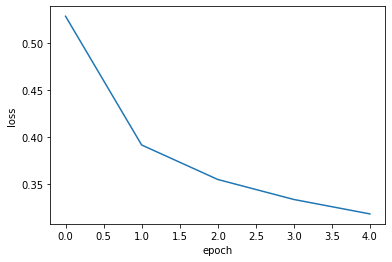

In [5]:
import matplotlib.pyplot as plt

# 손실을 그래프화합니다.
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

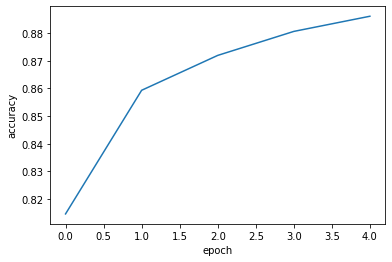

In [6]:
# 정확도를 그래프화합니다.
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

에포크가 증가할수록 성능이 증가합니다.

에포크를 20으로 늘린 결과를 그래프화해 보겠습니다.

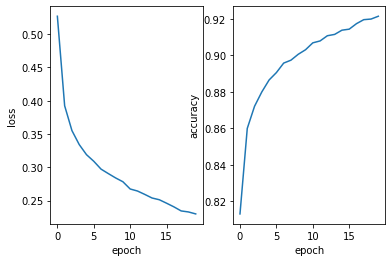

In [7]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## **검증 손실**

에포크에 따른 과적합을 판단하려면 검증 데이터 세트에 대한 점수 또한 고려해야 합니다. 인공 신경망 모델의 최적화 대상은 손실 함수입니다. 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있습니다. 따라서 모델 훈련 정도를 판단하려면 손실 함수 값을 확인하는 편이 좋습니다.

에포크마다 검증 손실을 계산하려면 `fit()` 메서드에 검증 데이터를 전달합니다. 코드로 먼저 예시하겠습니다.

In [8]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# `validation_data` 매개변수에 검증 데이터 세트를 튜플 형태로 지정합니다.
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
print(history.history)
print(history.history.keys())

{'loss': [0.5265119075775146, 0.39179638028144836, 0.3540659546852112, 0.3318682909011841, 0.3168381452560425, 0.3057212829589844, 0.29746630787849426, 0.28786808252334595, 0.28136810660362244, 0.2732239067554474, 0.26772505044937134, 0.26174384355545044, 0.2566438317298889, 0.2548021972179413, 0.24763506650924683, 0.2437933087348938, 0.24018195271492004, 0.2365282028913498, 0.23097996413707733, 0.2262219488620758], 'accuracy': [0.8141250014305115, 0.8588749766349792, 0.8730000257492065, 0.8803125023841858, 0.8859999775886536, 0.890333354473114, 0.895354151725769, 0.8974375128746033, 0.9007083177566528, 0.9043958187103271, 0.9052083492279053, 0.9087916612625122, 0.911104142665863, 0.9112083315849304, 0.914145827293396, 0.9163125157356262, 0.9175208210945129, 0.9192916750907898, 0.9197083115577698, 0.9223541617393494], 'val_loss': [0.42040055990219116, 0.3885265588760376, 0.3584778308868408, 0.3742852509021759, 0.3587069809436798, 0.36255908012390137, 0.36588001251220703, 0.358348757028

검증 데이터 세트에 대한 손실과 정확도가 추가됐습니다.

이 요소들을 그래프로 그려보겠습니다.

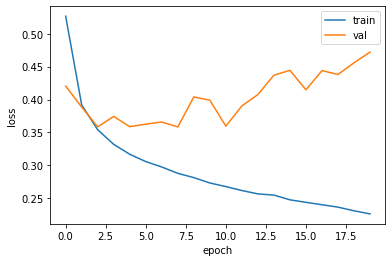

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

훈련 손실은 꾸준히 증가하는 반면 검증 손실은 일정 구간까지 하강하다가 상승합니다. 검증 손실이 상승하는 시점을 최대한 뒤로 늦추면 검증 손실이 줄어들고 정확도도 증가합니다.

과대적합을 막기 위한 여러 방법이 존재합니다. 그 중에 먼저 옵티마이저의 매개변수를 조정하여 과대적합을 완화해 보겠습니다. 기본 RMSprop 옵티마이저는 여러 케이스에서 잘 작동합니다만, 다른 옵티마이저를 적용한다면 우선 Adam을 선택하는 편이 좋습니다. Adam은 적응적 학습률을 사용하므로 에포크에 진행됨에 따라 학습률 크기를 조정합니다. 일단 Adam 옵티마이저를 적용해 보겠습니다.

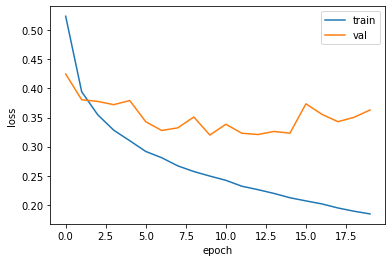

In [11]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

이전보다 검증 손실 그래프가 하강하고 있으며 과대적합이 많이 줄어들었습니다. Adam 옵티마이저가 적합한 것으로 사료됩니다. 여기서 추가로 더 해볼 수 있는 작업은 학습률 조정입니다. 일단 생략하고 넘어가겠습니다.

## **드롭아웃**



---

작업 중

---



## **모델 저장과 복원**

## **콜백**